In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [3]:
# 导入数据集
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

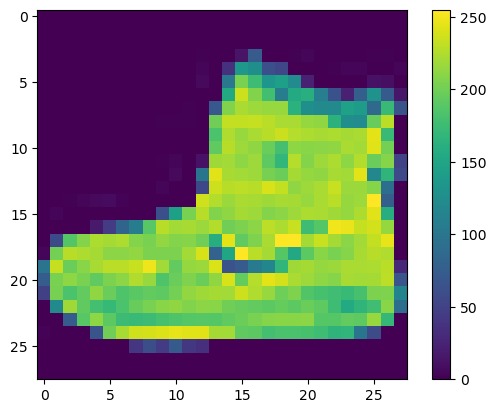

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

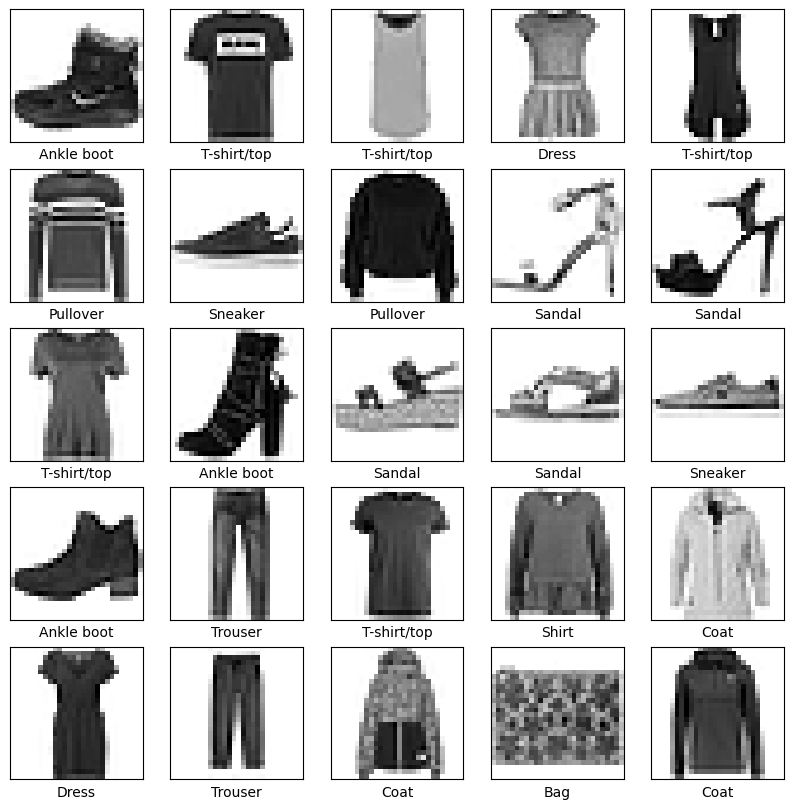

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  #刻度
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])  # 标签
plt.show()

In [12]:
# 构建模型
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
# 编译模型 添加损失函数 优化器 指标
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# 训练模型
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
   1/1875 [..............................] - ETA: 4:36 - loss: 196.4162 - accuracy: 0.0625

2023-12-28 09:24:44.217238: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 696us/step - loss: 3.3915 - accuracy: 0.7147
Epoch 2/10
1875/1875 [==============================] - 1s 710us/step - loss: 0.6676 - accuracy: 0.7728
Epoch 3/10
1875/1875 [==============================] - 1s 612us/step - loss: 0.5733 - accuracy: 0.8032
Epoch 4/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.5181 - accuracy: 0.8216
Epoch 5/10
1875/1875 [==============================] - 1s 617us/step - loss: 0.5041 - accuracy: 0.8303
Epoch 6/10
1875/1875 [==============================] - 1s 625us/step - loss: 0.4895 - accuracy: 0.8353
Epoch 7/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.4815 - accuracy: 0.8381
Epoch 8/10
1875/1875 [==============================] - 1s 640us/step - loss: 0.4725 - accuracy: 0.8407
Epoch 9/10
1875/1875 [==============================] - 1s 735us/step - loss: 0.4710 - accuracy: 0.8423
Epoch 10/10
1875/1875 [==============================] - 2s 825us/step - lo

In [14]:
# 评估准确率
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n test accuracy:", test_acc)

313/313 - 0s - loss: 0.5921 - accuracy: 0.8262 - 203ms/epoch - 647us/step

 test accuracy: 0.826200008392334


In [15]:
# 进行预测
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 379us/step


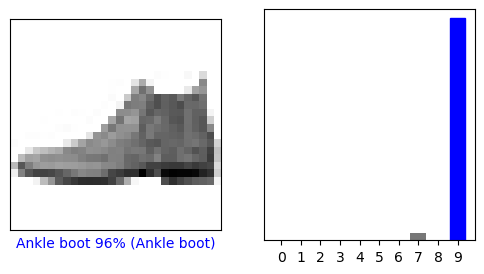

In [26]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

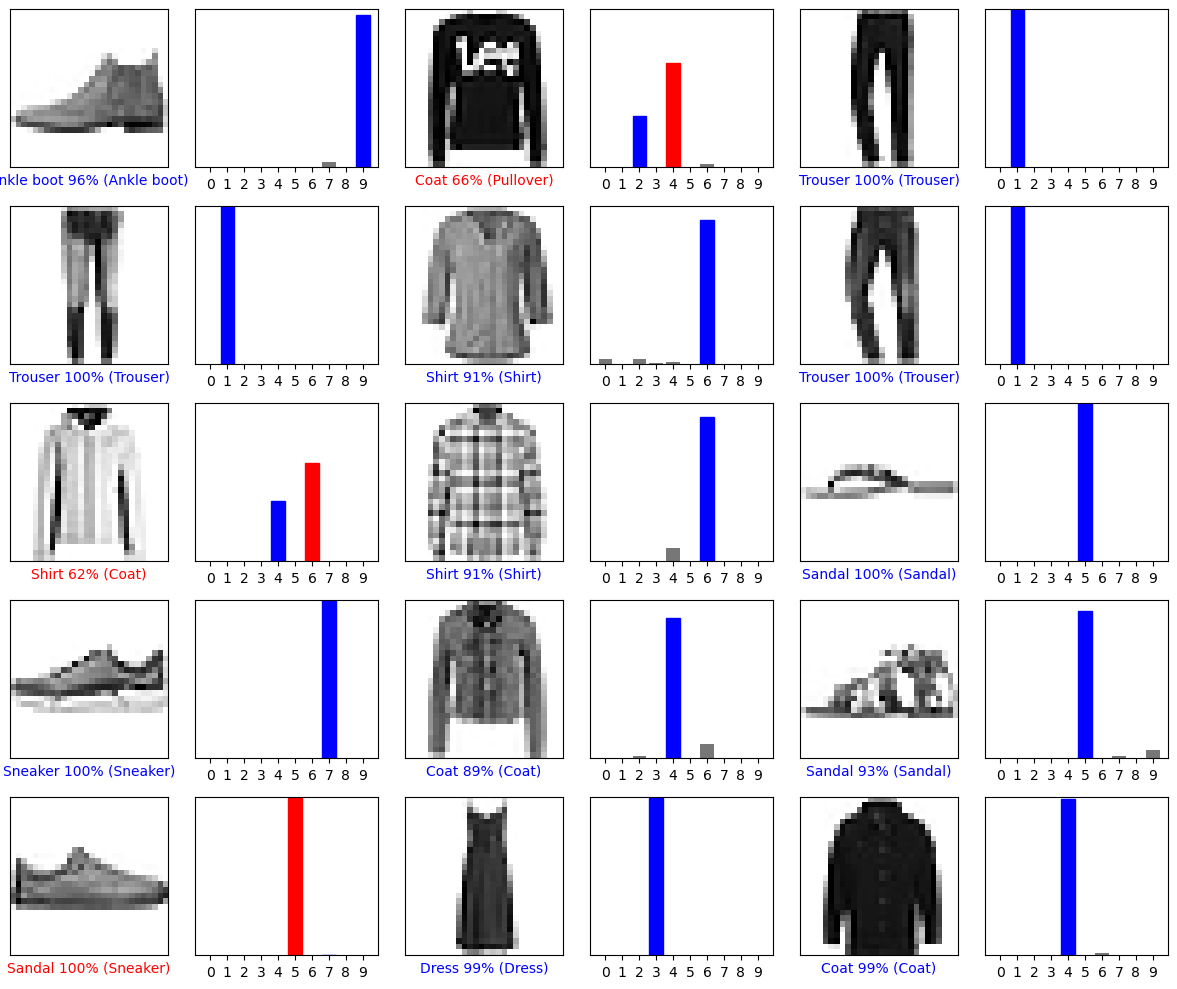

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
# 使用训练好的模型
img = test_images[1]
img = (np.expand_dims(img, 0))  # 将图像添加到列表中

(1, 28, 28)

In [23]:
# 预测图形的正确标签
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 15ms/step
[[9.9938836e-05 2.3025600e-03 3.2222939e-01 1.3936142e-03 6.5618920e-01
  6.1346023e-32 1.7663511e-02 0.0000000e+00 1.2170717e-04 1.7457120e-25]]


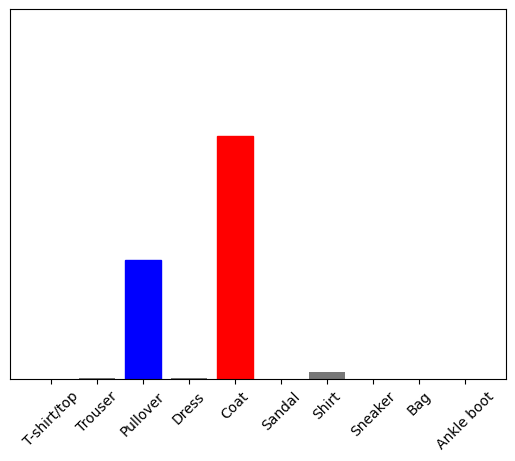

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()